## This project aims to detect Parkinson's disease using a powerful gradient boosting algorithm called XGBoost. 

### The dataset used is Parkinson's Dataset from the University of Oxford and in collaboration with the National Centre for Voice and Speech in Denver, Colorado.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
!pip install xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance
sns.set(color_codes=True)
%matplotlib inline

### Attribute Information:

**name** - ASCII subject name and recording number

**MDVP:Fo(Hz)** - Average vocal fundamental frequency

**MDVP:Fhi(Hz)** - Maximum vocal fundamental frequency

**MDVP:Flo(Hz)** - Minimum vocal fundamental frequency

**MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP** - Several measures of variation in fundamental frequency

**MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA** - Several measures of variation in amplitude

**NHR, HNR** - Two measures of ratio of noise to tonal components in the voice

**status** - Health status of the subject. One implies that the subjects have Parkinson's disease and zero implies that they are healthy

**RPDE, D2** - Two nonlinear dynamical complexity measures

**DFA** - Signal fractal scaling exponent

**spread1, spread2, PPE** - Three nonlinear measures of fundamental frequency variation

In [2]:
pip install kaggle

Note: you may need to restart the kernel to use updated packages.


In [4]:
!kaggle datasets download -d thecansin/parkinsons-data-set

parkinsons-data-set.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
try:
    parkinsons_data = pd.read_csv("F:\Resume\Projects Portfolio\parkinsons\parkinsons.data")
except FileNotFoundError:
    print("Dataset file not found. Please make sure the file is in the correct directory.")

parkinsons_data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


The above code loads the file named "parkinsons.data" using the pandas library. If the file was found, the data will be loaded into a pandas DataFrame called "parkinsons_data" and if the file was not found, an error message will be displayed.

There are 195 rows and 24 columns in the dataset.

In [6]:
#Understanding the dataset's composition
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [7]:
print(parkinsons_data.head())

             name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0  phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1  phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2  phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3  phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4  phon_R01_S01_5      116.014       141.781       110.655         0.01284   

   MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  ...  \
0           0.00007   0.00370   0.00554     0.01109       0.04374  ...   
1           0.00008   0.00465   0.00696     0.01394       0.06134  ...   
2           0.00009   0.00544   0.00781     0.01633       0.05233  ...   
3           0.00009   0.00502   0.00698     0.01505       0.05492  ...   
4           0.00011   0.00655   0.00908     0.01966       0.06425  ...   

   Shimmer:DDA      NHR     HNR  status      RPDE       DFA   spread1  \
0      0.0654

In [8]:
#Explore the columns
print(parkinsons_data.columns)

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')


In [9]:
#Checking for Null Values
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [10]:
#generates a statistical summary of the dataset's numerical columns
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [11]:
#Counts the frequency of the "status's 0 and 1"
status_count = parkinsons_data['status'].value_counts()
print(status_count)

status
1    147
0     48
Name: count, dtype: int64


In [12]:
# Extract the counts for each category
parkinson_cases = status_count  [1]
non_parkinson_cases = status_count [0]

# Calculate the percentages
parkinson_percentage = (parkinson_cases / parkinsons_data.shape[0]) * 100
non_parkinson_percentage = (non_parkinson_cases / parkinsons_data.shape[0]) * 100

# Print the results
print("Number of cases having Parkinson's disease:", parkinson_cases, "(", parkinson_percentage, "%)")
print("Number of cases not having Parkinson's disease:", non_parkinson_cases, "(", non_parkinson_percentage, "%)")

Number of cases having Parkinson's disease: 147 ( 75.38461538461539 %)
Number of cases not having Parkinson's disease: 48 ( 24.615384615384617 %)


<Axes: xlabel='status', ylabel='count'>

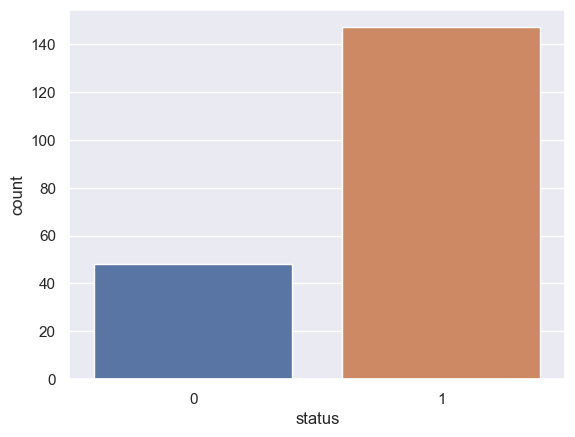

In [13]:
# Plot count of each status using a bar plot
sns.countplot(data=parkinsons_data, x='status')

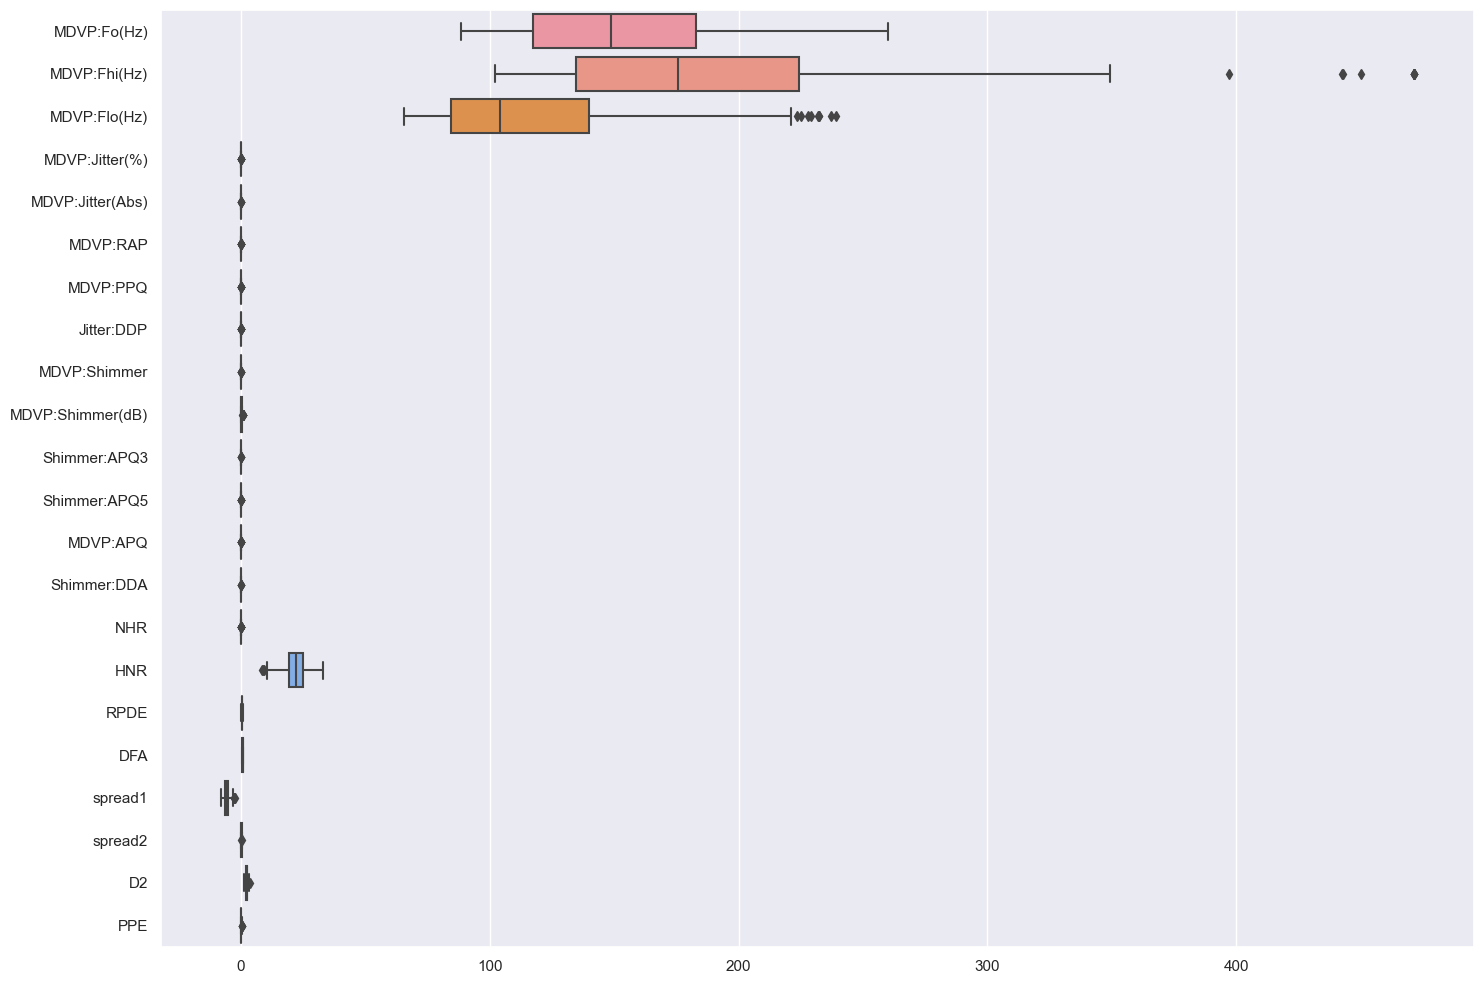

In [66]:
# Identify outliers in all atributes except 'status'
plt.figure(figsize=(15, 10))
sns.boxplot(data=parkinsons_data.drop('status', axis=1), orient='h')
plt.tight_layout()

The box plots are diverse and its hard to see the outliers. Hence, It's necessary to view them individually to see clearly.

Text(0.5, 1.0, 'Boxplot for MDVP (Vocal Fundamental Frequency) Attributes')

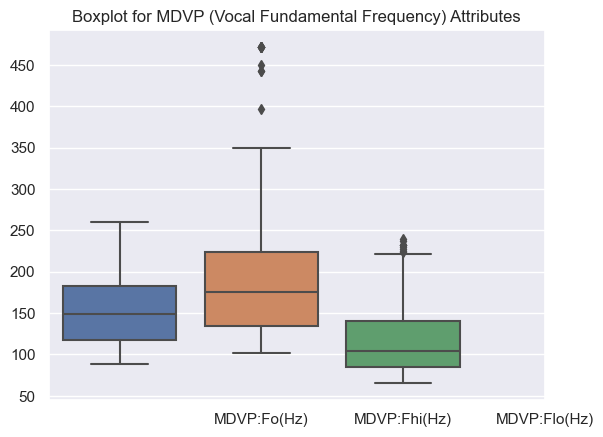

In [43]:
MDVP_attributes = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)']
subset_data = parkinsons_data[MDVP_attributes]

# Create a boxplot for the selected attributes
sns.boxplot(subset_data)

# Set the labels for the x-axis
plt.xticks(range(1, len(MDVP_attributes) + 1), MDVP_attributes)

# Set the title of the plot
plt.title('Boxplot for MDVP (Vocal Fundamental Frequency) Attributes')

Text(0.5, 1.0, 'Boxplot for Jitter Attributes')

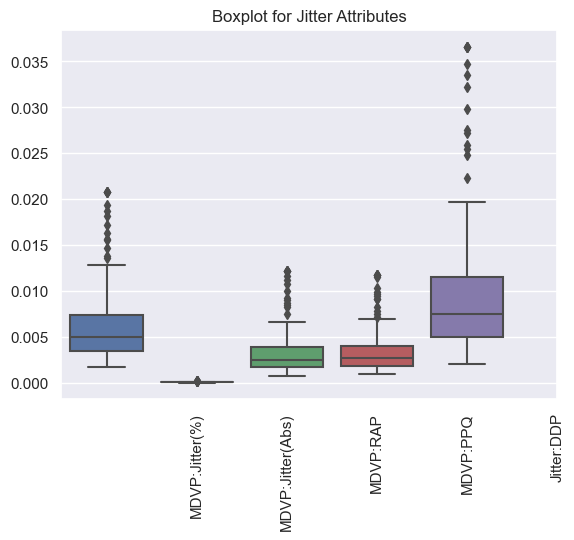

In [44]:
jitter_attributes = ['MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP']
subset_data = parkinsons_data[jitter_attributes]

# Create a boxplot for the selected attributes
sns.boxplot(subset_data)

# Set the labels for the x-axis with rotation
plt.xticks(range(1, len(jitter_attributes) + 1), jitter_attributes, rotation=90)

# Set the title of the plot
plt.title('Boxplot for Jitter Attributes')

Text(0.5, 1.0, 'Boxplot for Shimmer Attributes')

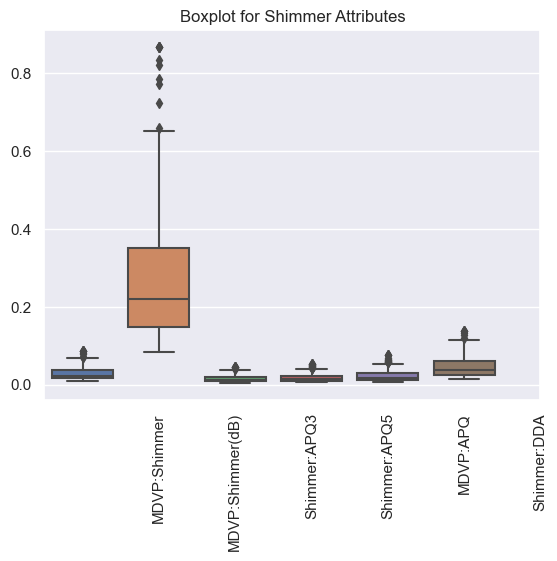

In [45]:
shimmer_attributes = ['MDVP:Shimmer','MDVP:Shimmer(dB)','Shimmer:APQ3','Shimmer:APQ5','MDVP:APQ','Shimmer:DDA']
subset_data = parkinsons_data[shimmer_attributes]

# Create a boxplot for the selected attributes
sns.boxplot(subset_data)

# Set the labels for the x-axis
plt.xticks(range(1, len(shimmer_attributes) + 1), shimmer_attributes, rotation=90)

# Set the title of the plot
plt.title('Boxplot for Shimmer Attributes')

Text(0.5, 1.0, 'Boxplot for NHR_HNR Attributes')

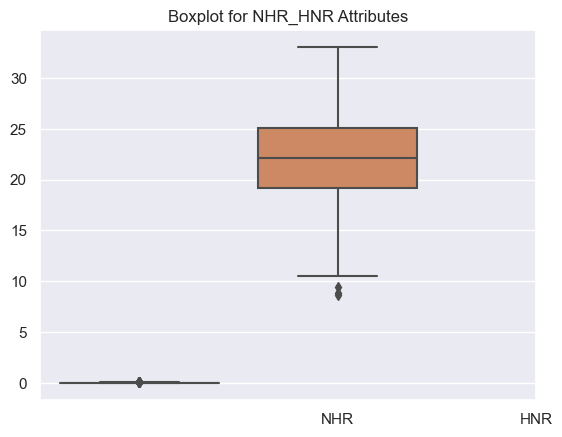

In [46]:
nhr_hnr_attributes = ['NHR','HNR']
subset_data = parkinsons_data[nhr_hnr_attributes]

# Create a boxplot for the selected attributes
sns.boxplot(subset_data)

# Set the labels for the x-axis
plt.xticks(range(1, len(nhr_hnr_attributes) + 1), nhr_hnr_attributes)

# Set the title of the plot
plt.title('Boxplot for NHR_HNR Attributes')

Text(0.5, 1.0, 'Boxplot for RPDE,D2 Attributes')

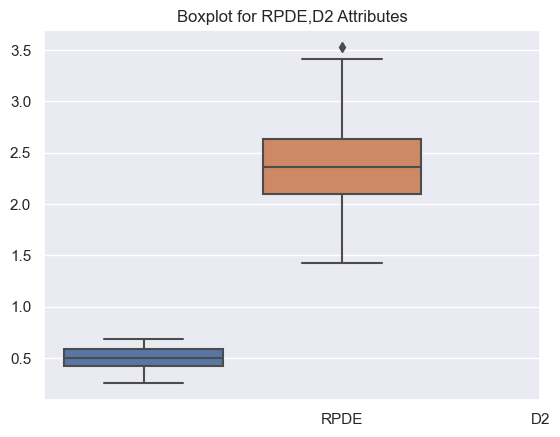

In [47]:
rpde_d2_attributes = ['RPDE','D2']
subset_data = parkinsons_data[rpde_d2_attributes ]

# Create a boxplot for the selected attributes
sns.boxplot(subset_data)

# Set the labels for the x-axis
plt.xticks(range(1, len(rpde_d2_attributes ) + 1), rpde_d2_attributes )

# Set the title of the plot
plt.title('Boxplot for RPDE,D2 Attributes')

Text(0.5, 1.0, 'Boxplot for DFA Attributes')

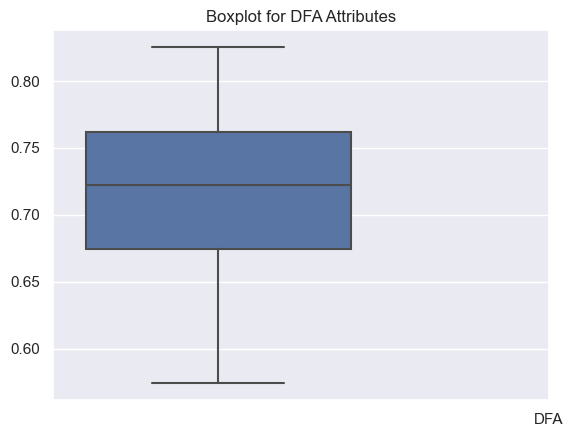

In [48]:
dfa_attributes = ['DFA']
subset_data = parkinsons_data[dfa_attributes]

# Create a boxplot for the selected attributes
sns.boxplot(subset_data)

# Set the labels for the x-axis
plt.xticks(range(1, len(dfa_attributes) + 1), dfa_attributes)

# Set the title of the plot
plt.title('Boxplot for DFA Attributes')

Text(0.5, 1.0, 'Boxplot for spread1,spread2,PPE Attributes')

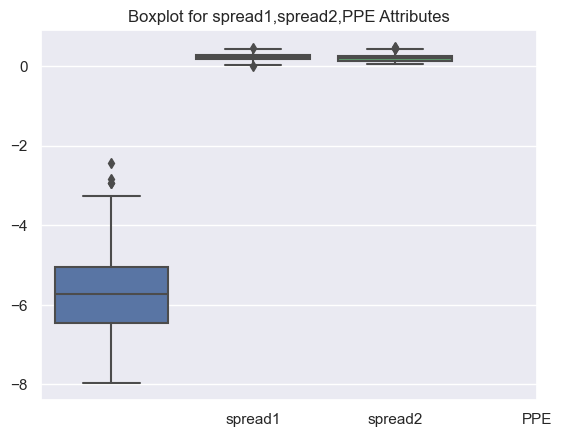

In [49]:
spread1_spread2_PPE_attributes = ['spread1','spread2','PPE']
subset_data = parkinsons_data[spread1_spread2_PPE_attributes]

# Create a boxplot for the selected attributes
sns.boxplot(subset_data)

# Set the labels for the x-axis
plt.xticks(range(1, len(spread1_spread2_PPE_attributes) + 1), spread1_spread2_PPE_attributes)

# Set the title of the plot
plt.title('Boxplot for spread1,spread2,PPE Attributes')

In [22]:
# It is not neccessary to treat outliers as we will use XGBoost, however, there is nothing wrong in treating them 
def treat_outliers(df, column_name):
    mean = df[column_name].mean()
    std_dev = df[column_name].std()
    upper_limit = mean + 3 * std_dev
    lower_limit = mean - 3 * std_dev
    df[column_name] = df[column_name].apply(lambda x: upper_limit if x > upper_limit else (lower_limit if x < lower_limit else x))
    return df

In [23]:
treat_outliers(parkinsons_data, parkinsons_data.columns[1]) 
treat_outliers(parkinsons_data, parkinsons_data.columns[2])
treat_outliers(parkinsons_data, parkinsons_data.columns[3])
treat_outliers(parkinsons_data, parkinsons_data.columns[4]) 
treat_outliers(parkinsons_data, parkinsons_data.columns[5])
treat_outliers(parkinsons_data, parkinsons_data.columns[6])
treat_outliers(parkinsons_data, parkinsons_data.columns[7])
treat_outliers(parkinsons_data, parkinsons_data.columns[8]) 
treat_outliers(parkinsons_data, parkinsons_data.columns[9])
treat_outliers(parkinsons_data, parkinsons_data.columns[10])
treat_outliers(parkinsons_data, parkinsons_data.columns[11])
treat_outliers(parkinsons_data, parkinsons_data.columns[12])
treat_outliers(parkinsons_data, parkinsons_data.columns[13])
treat_outliers(parkinsons_data, parkinsons_data.columns[14])
treat_outliers(parkinsons_data, parkinsons_data.columns[15])
treat_outliers(parkinsons_data, parkinsons_data.columns[16])
treat_outliers(parkinsons_data, parkinsons_data.columns[18])
treat_outliers(parkinsons_data, parkinsons_data.columns[19])
treat_outliers(parkinsons_data, parkinsons_data.columns[20])
treat_outliers(parkinsons_data, parkinsons_data.columns[21])               
treat_outliers(parkinsons_data, parkinsons_data.columns[22])
treat_outliers(parkinsons_data, parkinsons_data.columns[23])

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,...,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,...,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,...,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,...,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


Outlier treatment is not necessary for XGBoost because it is less sensitive to outliers than other boosting algorithms. It is due to a regularization term in its objective function that penalizes large weights. This regularization term helps to reduce the impact of outliers on the model’s predictions. 

Text(0.5, 1.0, 'Scatter Plot of MDVP:Fo(Hz) vs. MDVP:Fhi(Hz)')

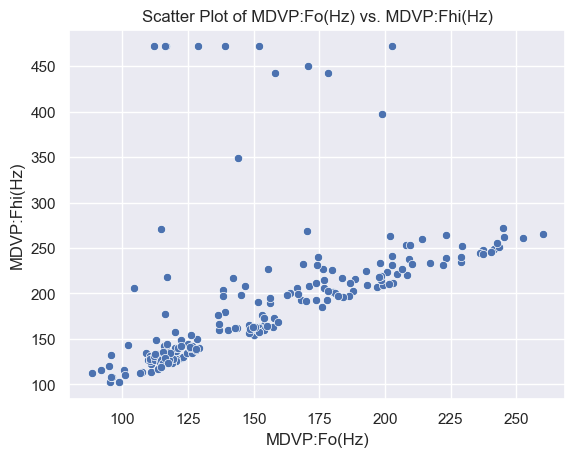

In [58]:
#ScattterPlot of MDVP:Fo(Hz) vs. MDVP:Fhi(Hz)

X = parkinsons_data['MDVP:Fo(Hz)']
Y = parkinsons_data['MDVP:Fhi(Hz)']

sns.scatterplot(data=parkinsons_data, x = X, y = Y)
plt.xlabel('MDVP:Fo(Hz)')
plt.ylabel('MDVP:Fhi(Hz)')
plt.title('Scatter Plot of MDVP:Fo(Hz) vs. MDVP:Fhi(Hz)')

<Axes: xlabel='MDVP:Jitter(%)', ylabel='HNR'>

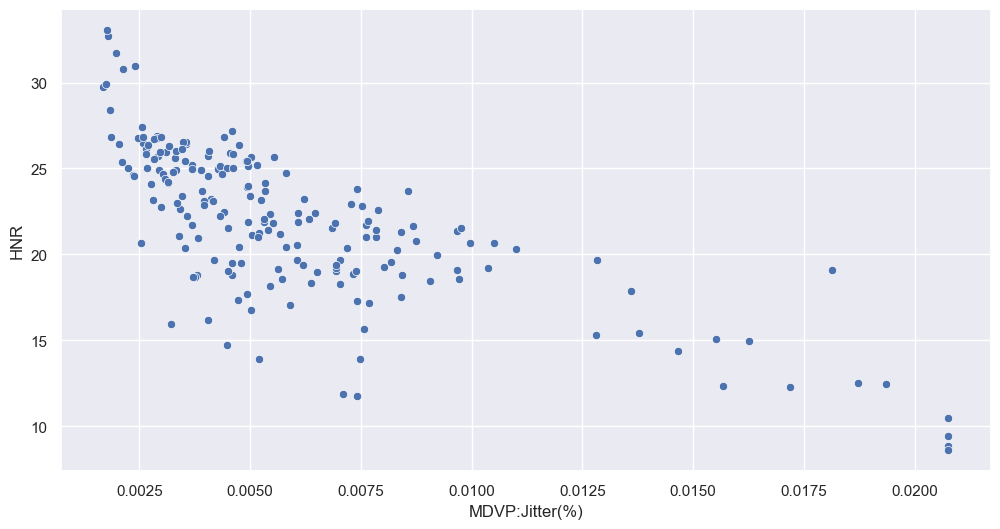

In [25]:
# scatter plot between MDVP:Jitter(%) and HNR
plt.figure(figsize = (12,6))
sns.scatterplot(x = 'MDVP:Jitter(%)', y = 'HNR', data = parkinsons_data)

In [26]:
# Calculate the correlation matrix
correlation_matrix = parkinsons_data.corr(numeric_only=True)
correlation_matrix

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.476517,0.596546,-0.150105,-0.425484,-0.096166,-0.156270,-0.096212,-0.110378,-0.094346,...,-0.100196,-0.014491,0.059361,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177890,-0.378650
MDVP:Fhi(Hz),0.476517,1.000000,0.109758,0.052001,-0.115254,0.044295,0.034314,0.044233,-0.033010,0.010812,...,-0.048388,0.142111,-0.013334,-0.177441,-0.138213,-0.383042,-0.102027,-0.001930,0.204139,-0.095133
MDVP:Flo(Hz),0.596546,0.109758,1.000000,-0.184405,-0.309277,-0.135092,-0.141912,-0.135085,-0.160794,-0.146774,...,-0.159387,-0.141238,0.211211,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.102496,-0.346851
MDVP:Jitter(%),-0.150105,0.052001,-0.184405,1.000000,0.932986,0.986946,0.971788,0.986953,0.745839,0.780739,...,0.712980,0.872243,-0.747764,0.311876,0.379740,0.137666,0.730623,0.409250,0.455218,0.746974
MDVP:Jitter(Abs),-0.425484,-0.115254,-0.309277,0.932986,1.000000,0.908987,0.912117,0.909011,0.686467,0.705744,...,0.661940,0.771839,-0.664603,0.372235,0.464435,0.239242,0.781860,0.429338,0.316839,0.787431
MDVP:RAP,-0.096166,0.044295,-0.135092,0.986946,0.908987,1.000000,0.955109,0.999999,0.741389,0.773074,...,0.714424,0.878880,-0.748215,0.302738,0.359965,0.105014,0.686628,0.344732,0.453917,0.696276
MDVP:PPQ,-0.156270,0.034314,-0.141912,0.971788,0.912117,0.955109,1.000000,0.955115,0.776843,0.813454,...,0.738667,0.810982,-0.750344,0.323197,0.350116,0.237460,0.748410,0.419823,0.424320,0.793357
Jitter:DDP,-0.096212,0.044233,-0.135085,0.986953,0.909011,0.999999,0.955115,1.000000,0.741380,0.773053,...,0.714421,0.878891,-0.748206,0.302747,0.359920,0.104967,0.686681,0.344719,0.453893,0.696330
MDVP:Shimmer,-0.110378,-0.033010,-0.160794,0.745839,0.686467,0.741389,0.776843,0.741380,1.000000,0.988340,...,0.989151,0.719938,-0.837760,0.378327,0.453581,0.164272,0.651386,0.447459,0.512510,0.683309
MDVP:Shimmer(dB),-0.094346,0.010812,-0.146774,0.780739,0.705744,0.773074,0.813454,0.773053,0.988340,1.000000,...,0.968289,0.746370,-0.834388,0.366497,0.420433,0.166926,0.648896,0.447755,0.518581,0.683216


Text(0.5, 1.0, 'Correlation Matrix')

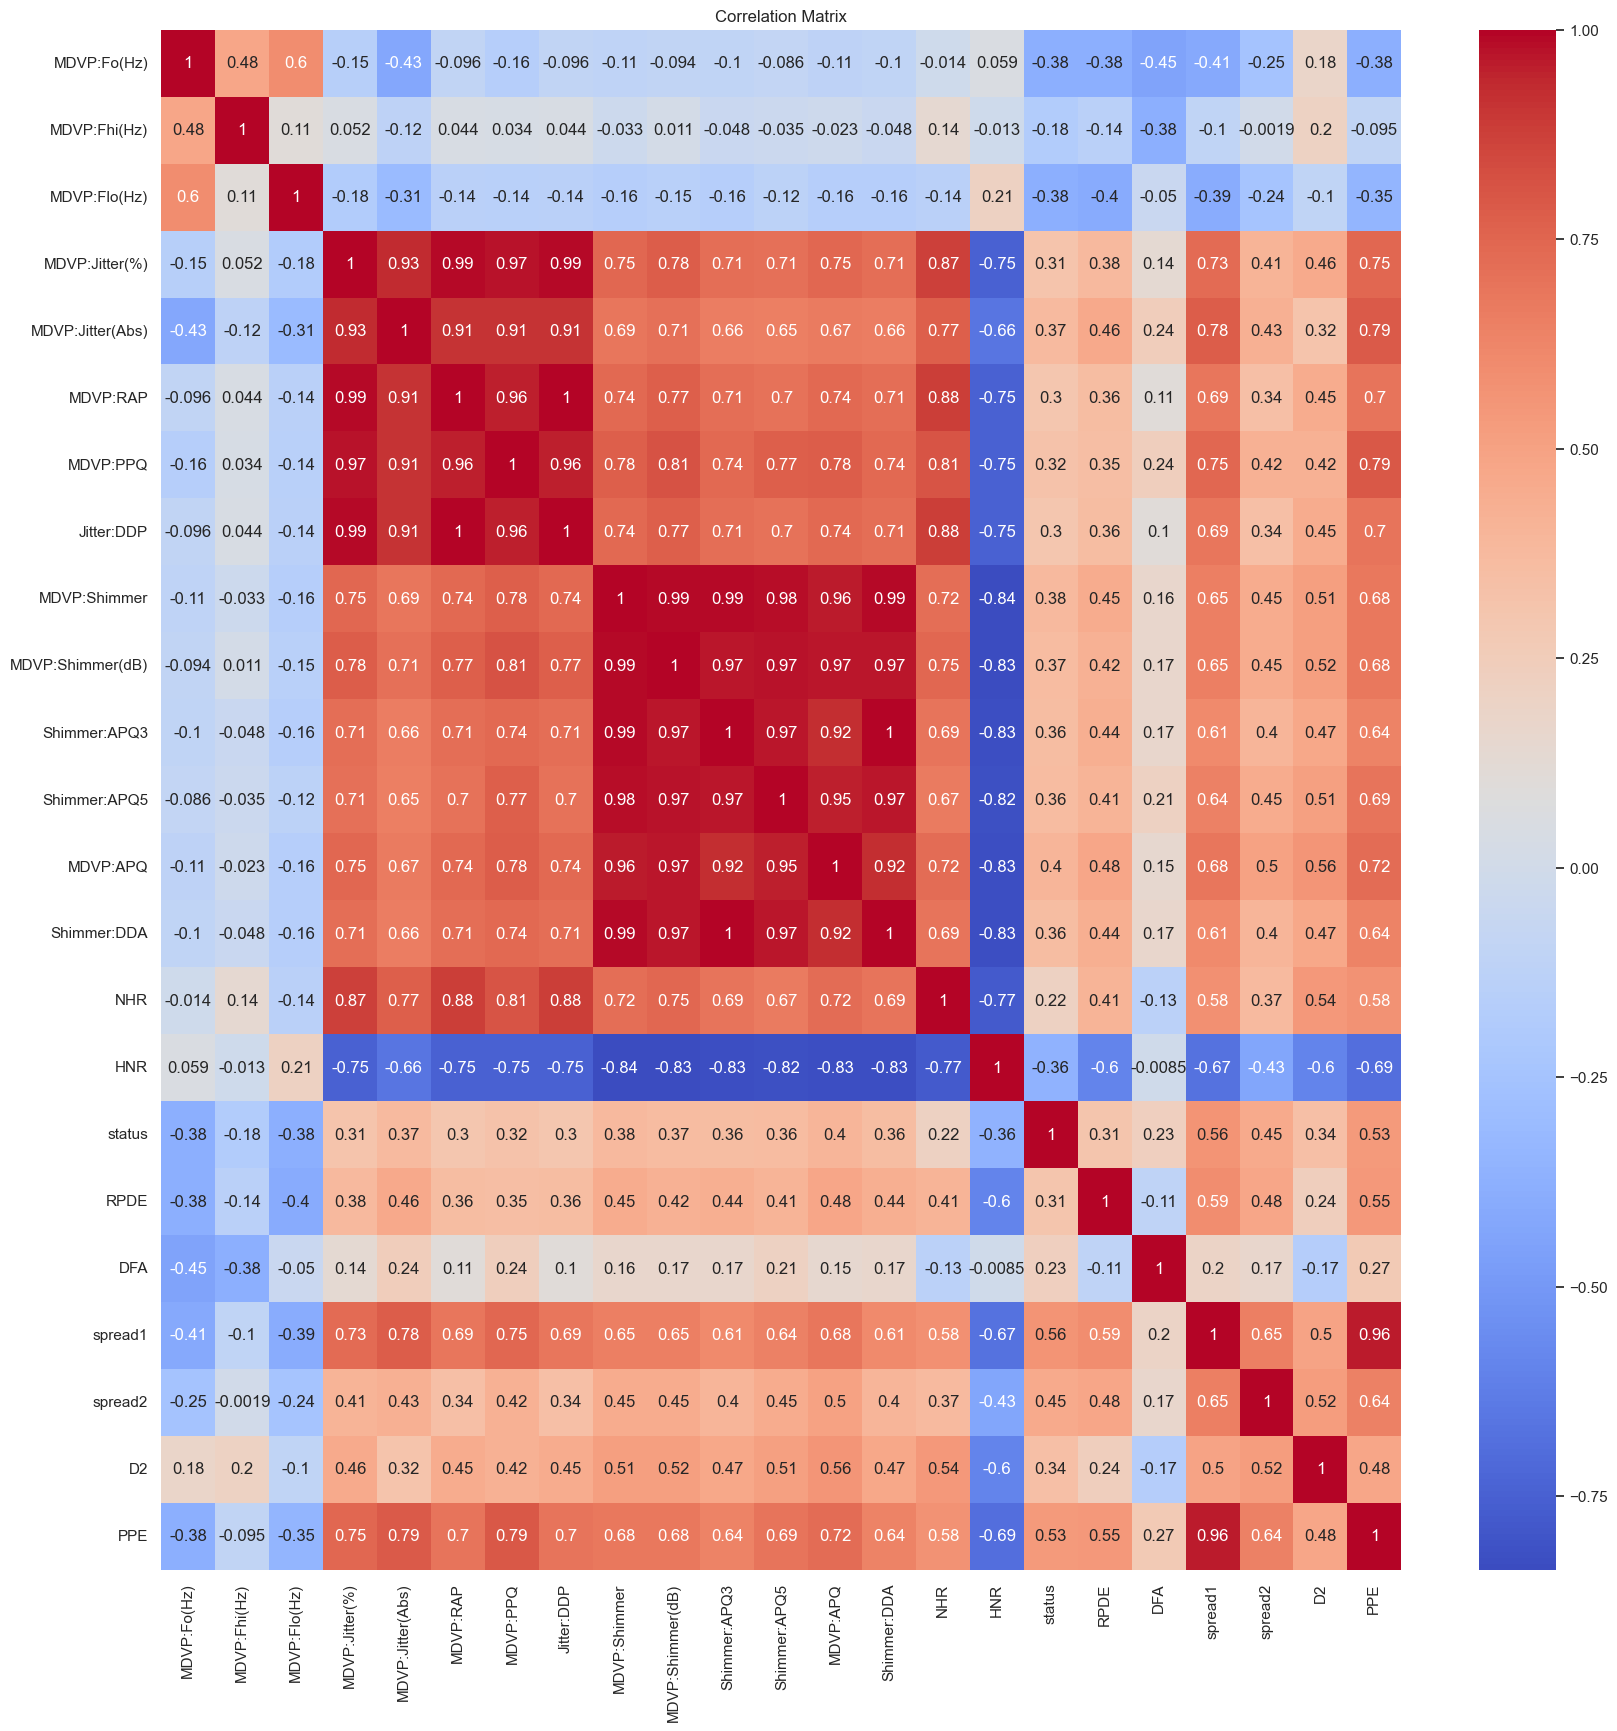

In [27]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix , annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

### Feature Selection

All the columns except the status column are independent variables.

In [28]:
variables = parkinsons_data.loc[:, parkinsons_data.columns != 'status'].values[:, 1:]
labels = parkinsons_data.loc[:, 'status'].values

# Printing the extracted input features and output labels
print("Variables:")
print(variables)
print("Status Labels:")
print(labels)

# Counting the occurrences of positive and negative labels
positive_count = labels[labels == 1].shape[0]
negative_count = labels[labels == 0].shape[0]

print("Positive Label Count:", positive_count)
print("Negative Label Count:", negative_count)

Variables:
[[119.992 157.302 74.997 ... 0.266482 2.301442 0.284654]
 [122.4 148.65 113.819 ... 0.33559 2.486855 0.368674]
 [116.682 131.111 111.555 ... 0.311173 2.342259 0.332634]
 ...
 [174.688 240.005 74.287 ... 0.158453 2.679772 0.131728]
 [198.764 396.961 74.904 ... 0.207454 2.138608 0.123306]
 [214.289 260.277 77.973 ... 0.190667 2.555477 0.148569]]
Status Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0]
Positive Label Count: 147
Negative Label Count: 48


In [29]:
x = variables
y = labels

# Split the data into training and testing sets, x: input variables, y: target labels
# test_size: proportion of the data to allocate for testing (here, 20%)
# random_state: seed for random number generation to ensure reproducibility
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=7)

# Print the shapes of the original data and the training/testing sets
print(x.shape,x_train.shape,x_test.shape)

(195, 22) (156, 22) (39, 22)


In [30]:
# Create an instance of the StandardScaler
# Fit the scaler to the training and testing data

std_scaler=StandardScaler()
x_train_fit = std_scaler.fit(x_train)
x_test_fit = std_scaler.fit(x_test)
sld_train =  x_train_fit.transform(x_train)
sld_test = x_test_fit.transform(x_test)

Normalizing the data is not necessary for XGBoost as it is a decision tree based model. However, it is always a good practice to normalize the data.

In [31]:
# Create an instance of the XGBClassifier
# Fit the model to the training data
model = XGBClassifier()
model.fit(sld_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
def crossValidate(model):
    # Using StratifiedKFold to randomly shuffle and divide the data into 10 folds
    strat_k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

    # Specifying the performance metrics we are interested in
    performance_metrics = ["accuracy", "precision", "recall", "f1", "roc_auc"]

    # Performing cross-validation using the specified model, data, and evaluation metrics
    cv_results = cross_validate(model, x, y, cv=strat_k_fold, scoring=performance_metrics)

    # Extracting the mean performance scores from the cross-validation results
    result = [round(cv_results[score].mean(), 3) for score in cv_results]

    return result

In [33]:
#Perform cross-validation on the given model and obtain the mean performance scores
# Extract the performance scores starting from the third element
result = crossValidate(model)
result[2:]

[0.938, 0.941, 0.98, 0.96, 0.969]

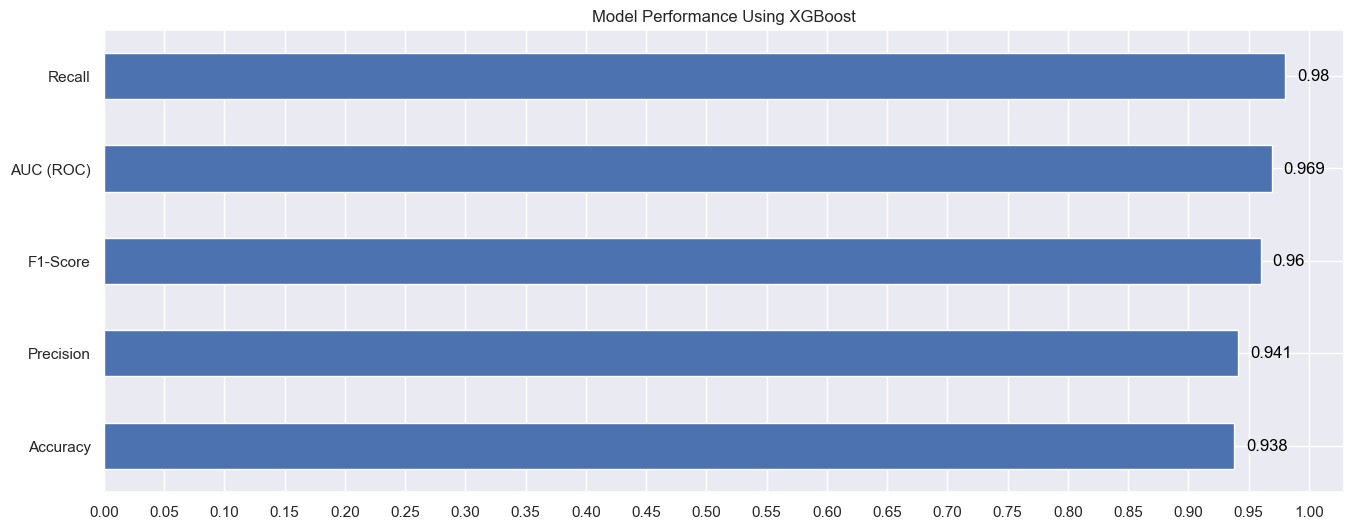

In [60]:
plt.figure(figsize=(16, 6))

# Create a pandas Series with the performance scores
model_performance = pd.Series(data=result[2:], index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC (ROC)'])

# Sort the Series in ascending order
model_performance = model_performance.sort_values()

# Create the horizontal bar plot
ax = model_performance.plot.barh()

# Set the x-axis tick locations
plt.xticks(np.arange(0, 1.05, 0.05))

# Set the title of the plot
plt.title('Model Performance Using XGBoost')

# Add the values on top of each bar
for i, v in enumerate(model_performance):
    ax.text(v + 0.01, i, str(v), color='black', va='center')

In [35]:
# Make predictions on the training data
x_train_prediction=model.predict(sld_train)

# Calculate the accuracy score of the training data
training_data_accuracy=accuracy_score(y_train,x_train_prediction)

# Print the accuracy score
print("Accuracy score of training data: ",training_data_accuracy)

Accuracy score of training data:  1.0


In [36]:
# Generate predicted values for the test data
predicted_values=model.predict(sld_test)

# Calculate the accuracy score for the model
test_data_accuracy=accuracy_score(y_test, predicted_values)
# Print the accuracy score for the test data
print("Accuracy score of test data: ",test_data_accuracy.round(2))

Accuracy score of test data:  0.95


The model is performing equally well on both the training and testing data which means there is no overfiiting or underfitting. Therefore, we can consider it as a good model. However,  we can try to further optimize the model by tuning the hyperparameters.

### Hyperparameter Tuning

In [37]:
# Define the parameter grid
parameter_grid = {
    'learning_rate': [0.1, 0.01, 0.001, 0.3],
    'n_estimators': [100, 200, 600],
    'max_depth': [3, 5, 7]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, parameter_grid, cv=10, scoring='accuracy')
grid_search.fit(sld_train, y_train)

# Get the best hyperparameters
best_parameters = grid_search.best_params_
print("Best Hyperparameters:", best_parameters)

# Train the model with the best hyperparameters
best_model = XGBClassifier(**best_parameters)
best_model.fit(sld_train, y_train)

# Evaluate on the test set
test_accuracy = accuracy_score(y_test, best_model.predict(sld_test))
print("Accuracy score on test data with best hyperparameters:", test_accuracy.round(2))

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Accuracy score on test data with best hyperparameters: 0.95


In this case, there was no improvement in the accuracy of the model even after trying a 
few different values to tune the hyperparameters.

[[ 5  2]
 [ 0 32]]


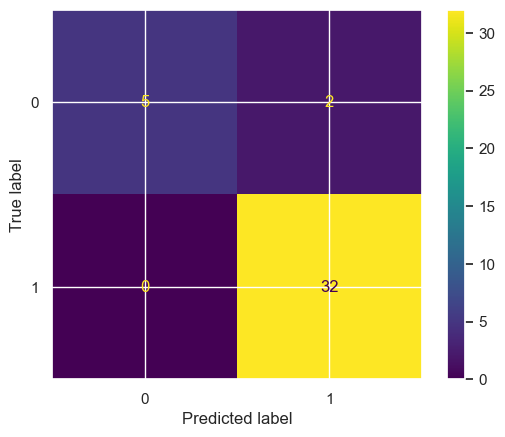

In [61]:
# Calculate the Confusion Matrix for the model
print(confusion_matrix(y_test, predicted_values))

#Create a ConfusionMatrixDisplay object from the model's predictions on the test set
ConfusionMatrixDisplay.from_estimator(model, sld_test, y_test)

ROC AUC score: 0.8571


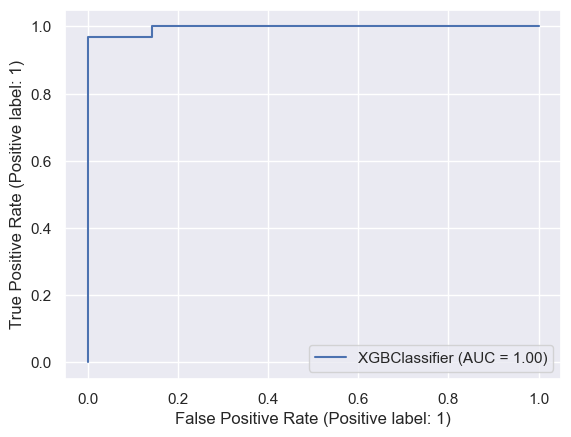

In [62]:
# Calculate and display ROC AUC score
roc_auc = roc_auc_score(y_test, predicted_values)
print("ROC AUC score: %.4f" % roc_auc)

# Plotting ROC Curve
RocCurveDisplay.from_estimator(model, sld_test, y_test)

Our classifier is a perfect classifier because it has an AUC value of 1

In [40]:
# Displaying the classification report

print(classification_report(y_test, predicted_values))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.94      1.00      0.97        32

    accuracy                           0.95        39
   macro avg       0.97      0.86      0.90        39
weighted avg       0.95      0.95      0.95        39



Text(0.5, 1.0, 'Feature Importance')

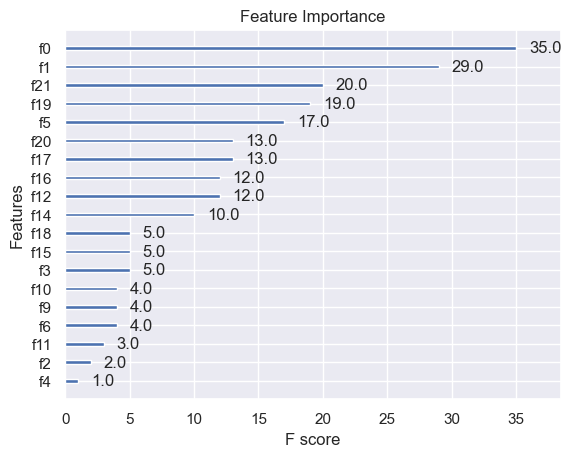

In [63]:
#Feature Importance Plot:
# Generate feature importance plot
plot_importance(model)
plt.title('Feature Importance')

In [67]:
# Let's input a set of values and check whether an individual has the disease or not

input_data=(244.99000,272.21000,239.17000,0.00451,0.00002,0.00279,0.00237,0.00837,0.01897,0.18100,0.01084,0.01121,0.01255,0.03253,0.01049,21.52800,0.522812,0.646818,-7.304500,0.171088,2.095237,0.096220)

# Convert input data to a NumPy array
input_data_array = np.asarray(input_data)

# Reshape the NumPy array to have a single row
input_data_array_reshaped = input_data_array.reshape(1, -1)

# Standardize the data using the scaler
standardized_data = std_scaler.fit_transform(input_data_array_reshaped)

# Predict the label using the model
prediction = model.predict(standardized_data)

# Print the prediction result
if prediction[0] == 0:
    print("The individual does have Parkinson's disease")
else:
    print("The individual does not have Parkinson's disease")

The individual does not have Parkinson's disease
